In [1]:
from collections import defaultdict, Counter
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
data = \
[[['маляр', 'павлин', 'подрядчик', 'староста', 'столяр'],
  ['корнилий', 'маляр', 'павлин', 'подрядчик', 'староста', 'столяр', 'чугунов'],
  ['глафира', 'корнилий', 'маляр', 'мурзавецкая', 'подрядчик', 'староста', 'столяр', 'чугунов'],
  ['маляр', 'павлин', 'подрядчик', 'староста', 'столяр', 'чугунов'],
  ['влас', 'мурзавецкий', 'павлин'],
  ['влас', 'глафира', 'мурзавецкий', 'павлин'],
  ['мурзавецкая', 'мурзавецкий', 'павлин'],
  ['мурзавецкая', 'павлин'],
  ['мурзавецкая', 'павлин', 'чугунов'],
  ['анфуса', 'лыняев', 'мурзавецкая', 'павлин'],
  ['анфуса', 'купавина', 'мурзавецкая'],
  ['глафира', 'мурзавецкая', 'павлин']],
 [['купавина', 'чугунов'],
  ['анфуса', 'купавина', 'лыняев'],
  ['анфуса', 'глафира', 'купавина', 'мурзавецкая', 'мурзавецкий'],
  ['анфуса', 'купавина', 'мурзавецкая', 'мурзавецкий'],
  ['купавина', 'мурзавецкий'],
  ['мурзавецкая', 'мурзавецкий'],
  ['анфуса', 'глафира', 'купавина', 'мурзавецкая', 'мурзавецкий'],
  ['глафира', 'купавина'],
  ['купавина'],
  ['глафира', 'купавина']],
 [['горецкий', 'чугунов'],
  ['анфуса', 'глафира', 'купавина', 'лыняев'],
  ['глафира', 'лыняев'],
  ['анфуса', 'купавина', 'лыняев'],
  ['анфуса', 'мурзавецкий'],
  ['анфуса', 'лыняев', 'мурзавецкий'],
  ['глафира', 'горецкий', 'лыняев'],
  ['глафира', 'лыняев'],
  ['анфуса', 'глафира', 'лыняев']],
 [['глафира', 'купавина', 'лакей'],
  ['анфуса', 'глафира', 'купавина'],
  ['анфуса', 'беркутов', 'лыняев'],
  ['беркутов', 'купавина', 'лыняев'],
  ['беркутов', 'купавина', 'лакей'],
  ['беркутов', 'горецкий', 'купавина'],
  ['беркутов', 'купавина'],
  ['беркутов', 'купавина', 'лыняев'],
  ['глафира', 'лыняев'],
  ['беркутов', 'глафира', 'купавина', 'лакей', 'лыняев']],
 [['павлин', 'чугунов'],
  ['мурзавецкая', 'чугунов'],
  ['мурзавецкая', 'мурзавецкий', 'чугунов'],
  ['мурзавецкая', 'павлин', 'чугунов'],
  ['беркутов', 'мурзавецкая'],
  ['беркутов', 'чугунов'],
  ['анфуса', 'беркутов', 'купавина', 'мурзавецкая'],
  ['купавина', 'мурзавецкая'],
  ['беркутов', 'купавина', 'мурзавецкая'],
  ['беркутов', 'купавина', 'мурзавецкая', 'павлин', 'чугунов'],
  ['анфуса', 'беркутов', 'глафира', 'купавина', 'лыняев', 'мурзавецкая', 'павлин', 'чугунов'],
  ['мурзавецкая', 'мурзавецкий', 'чугунов']]]

## Занятость

In [3]:
drama_heroes = [hero for scene in [scene for act in data for scene in act] for hero in scene]
busyness = pd.DataFrame(Counter(drama_heroes), index=['занятость'])
busyness

,анфуса,беркутов,влас,глафира,горецкий,корнилий,купавина,лакей,лыняев,маляр,мурзавецкая,мурзавецкий,павлин,подрядчик,староста,столяр,чугунов
занятость,15,13,2,17,3,2,25,3,15,4,21,12,14,4,4,4,14


## Матрица

In [4]:
drama_heroes = list(sorted(set(drama_heroes)))
matrices = [np.array([[1 if hero in scene else 0 for scene in act] for hero in drama_heroes]) for act in data]

In [5]:
def col(na, ns): return {1: 'I', 2: 'II', 3: 'III', 4: 'IV', 5: 'V', 6: 'VI'}[na] + '.' + str(ns)
columns = [[col(na+1, ns+1) for ns in range(len(matrices[na][0]))] for na in range(len(matrices))]
columns = [col for item in columns for col in item]

matrix = np.hstack(matrices)
pd.DataFrame(matrix, index=drama_heroes, columns=columns)

,I.1,I.2,I.3,I.4,I.5,I.6,I.7,I.8,I.9,I.10,I.11,I.12,II.1,II.2,II.3,II.4,II.5,II.6,II.7,II.8,II.9,II.10,III.1,III.2,III.3,III.4,III.5,III.6,III.7,III.8,III.9,IV.1,IV.2,IV.3,IV.4,IV.5,IV.6,IV.7,IV.8,IV.9,IV.10,V.1,V.2,V.3,V.4,V.5,V.6,V.7,V.8,V.9,V.10,V.11,V.12
анфуса,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,1,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
беркутов,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1,0,0,0,0,1,1,1,0,1,1,1,0
влас,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
глафира,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
горецкий,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
корнилий,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
купавина,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,0,0,0,1,1,0,1,1,1,1,1,0,1,0,0,0,0,0,0,1,1,1,1,1,0
лакей,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
лыняев,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,0,0,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
маляр,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Мобильность

In [6]:
mobility = (np.sum(np.abs(matrix[:, 1:] - matrix[:, :-1]), axis=1) - 1) / (len(matrix[0])-1)

In [7]:
pd.DataFrame({h: m for h, m in zip(drama_heroes, mobility)}, index=['мобильность']).round(3)

,анфуса,беркутов,влас,глафира,горецкий,корнилий,купавина,лакей,лыняев,маляр,мурзавецкая,мурзавецкий,павлин,подрядчик,староста,столяр,чугунов
мобильность,0.327,0.135,0.019,0.365,0.096,0.019,0.327,0.096,0.25,0.0,0.192,0.154,0.192,0.0,0.0,0.0,0.231


## Плотность

In [8]:
def density(matrix):
    print(np.count_nonzero(matrix), '/', matrix.size, sep='', end=', ')
    return np.count_nonzero(matrix)/matrix.size

### Пьесы

In [9]:
round(density(matrix), 3)

172/901, 

0.191

### Действий

In [10]:
act_density = [density(m) for m in matrices]
pd.DataFrame({i: d for i, d in enumerate(act_density, start=1)}, index=['плотность']).round(3)

51/204, 28/170, 24/153, 30/170, 39/204, 

,1,2,3,4,5
плотность,0.25,0.165,0.157,0.176,0.191


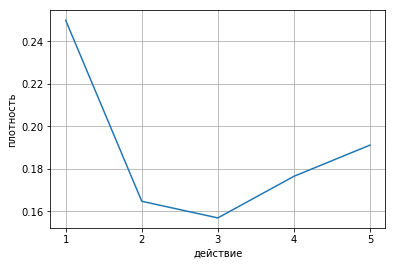

In [11]:
plt.plot(act_density)
plt.xticks(range(len(act_density)), range(1, len(act_density)+1))
plt.xlabel('действие')
plt.ylabel('плотность')
plt.grid()

### Явлений

In [12]:
scene_density = [[density(m[:, i]) for i in range(len(m[0]))] for m in matrices]

df = pd.DataFrame(scene_density, index=range(1, len(matrices)+1))
df.columns = df.columns + 1
df.index.name = 'действие'
df.round(3)

5/17, 7/17, 8/17, 6/17, 3/17, 4/17, 3/17, 2/17, 3/17, 4/17, 3/17, 3/17, 2/17, 3/17, 5/17, 4/17, 2/17, 2/17, 5/17, 2/17, 1/17, 2/17, 2/17, 4/17, 2/17, 3/17, 2/17, 3/17, 3/17, 2/17, 3/17, 3/17, 3/17, 3/17, 3/17, 3/17, 3/17, 2/17, 3/17, 2/17, 5/17, 2/17, 2/17, 3/17, 3/17, 2/17, 2/17, 4/17, 2/17, 3/17, 5/17, 8/17, 3/17, 

,1,2,3,4,5,6,7,8,9,10,11,12
действие,,,,,,,,,,,,
1,0.294,0.412,0.471,0.353,0.176,0.235,0.176,0.118,0.176,0.235,0.176,0.176
2,0.118,0.176,0.294,0.235,0.118,0.118,0.294,0.118,0.059,0.118,NaN,NaN
3,0.118,0.235,0.118,0.176,0.118,0.176,0.176,0.118,0.176,NaN,NaN,NaN
4,0.176,0.176,0.176,0.176,0.176,0.176,0.118,0.176,0.118,0.294,NaN,NaN
5,0.118,0.118,0.176,0.176,0.118,0.118,0.235,0.118,0.176,0.294,0.471,0.176


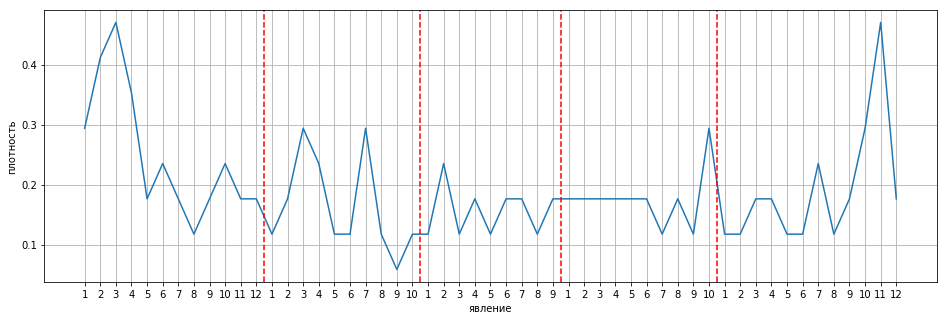

In [13]:
from itertools import accumulate
plt.subplots(figsize=(16, 5))
plt.plot([d for a in scene_density for d in a])
plt.xticks(range(len(columns)), [i for a in scene_density for i in range(1, len(a)+1)])
for x in accumulate([len(a) for a in scene_density][:-1]):
    plt.axvline(x-0.5, c='r', ls='--')
plt.xlabel('явление')
plt.ylabel('плотность')
plt.grid()

## Расстояние

In [14]:
distances_act = []
for mat in matrices:
    dist = np.zeros((len(drama_heroes), len(drama_heroes)))*np.nan
    for i in range(len(mat)-1):
        for j in range(i+1, len(mat)):
            if np.sum(mat[i]) != 0 and np.sum(mat[j]) != 0:
                dist[i][j] = np.sum(np.abs(mat[i] - mat[j]))
    distances_act.append(dist/len(mat[0]))

In [15]:
distances_drama = np.zeros((len(drama_heroes), len(drama_heroes)))*np.nan
for i in range(len(matrix)-1):
    for j in range(i+1, len(matrix)):
        distances_drama[i][j] = distances_drama[j][i] = np.sum(np.abs(matrix[i] - matrix[j]))
distances_drama /= len(matrix[0])

In [16]:
dfs = [pd.DataFrame(d, index=drama_heroes, columns=drama_heroes).stack() for d in distances_act]
dfs += [pd.DataFrame(distances_drama, index=drama_heroes, columns=drama_heroes).stack()]
df = pd.concat(dfs, axis=1)
df.columns = list(range(1, len(matrices)+1)) + ['пьеса']
df.round(2)

1    2     3    4     5  пьеса
анфуса   беркутов      NaN  NaN   NaN  0.7  0.33   0.42
         влас         0.33  NaN   NaN  NaN   NaN   0.32
         глафира      0.42  0.4  0.67  0.4  0.08   0.38
         горецкий      NaN  NaN  0.78  0.3   NaN   0.34
         корнилий     0.33  NaN   NaN  NaN   NaN   0.32
         купавина     0.08  0.5  0.33  0.8  0.25   0.38
         лакей         NaN  NaN   NaN  0.5   NaN   0.34
         лыняев       0.08  0.3  0.44  0.5  0.08   0.26
         маляр        0.50  NaN   NaN  NaN   NaN   0.36
         мурзавецкая  0.42  0.2   NaN  NaN  0.67   0.42
         мурзавецкий  0.42  0.3  0.33  NaN  0.33   0.32
         павлин       0.83  NaN   NaN  NaN  0.33   0.47
         подрядчик    0.50  NaN   NaN  NaN   NaN   0.36
         староста     0.50  NaN   NaN  NaN   NaN   0.36
         столяр       0.50  NaN   NaN  NaN   NaN   0.36
         чугунов      0.50  0.5  0.67  NaN  0.67   0.51
беркутов анфуса        NaN  NaN   NaN  NaN   NaN   0.42
         влас          NaN  NaN   NaN  NaN   NaN   0.28
         глафира       NaN  NaN   NaN  0.9  0.42   0.49
         горецкий      NaN  NaN   NaN  0.6   NaN   0.26
         корнилий      NaN  NaN   NaN  NaN   NaN   0.28
         купавина      NaN  NaN   NaN  0.3  0.25   0.34
         лакей         NaN  NaN   NaN  0.6   NaN   0.23
         лыняев        NaN  NaN   NaN  0.4  0.42   0.34
         маляр         NaN  NaN   NaN  NaN   NaN   0.32
         мурзавецкая   NaN  NaN   NaN  NaN  0.50   0.45
         мурзавецкий   NaN  NaN   NaN  NaN  0.67   0.47
         павлин        NaN  NaN   NaN  NaN  0.50   0.43
         подрядчик     NaN  NaN   NaN  NaN   NaN   0.32
         староста      NaN  NaN   NaN  NaN   NaN   0.32
...                    ...  ...   ...  ...   ...    ...
столяр   влас          NaN  NaN   NaN  NaN   NaN   0.11
         глафира       NaN  NaN   NaN  NaN   NaN   0.36
         горецкий      NaN  NaN   NaN  NaN   NaN   0.13
         корнилий      NaN  NaN   NaN  NaN   NaN   0.04
         купавина      NaN  NaN   NaN  NaN   NaN   0.55
         лакей         NaN  NaN   NaN  NaN   NaN   0.13
         лыняев        NaN  NaN   NaN  NaN   NaN   0.36
         маляр         NaN  NaN   NaN  NaN   NaN   0.00
         мурзавецкая   NaN  NaN   NaN  NaN   NaN   0.43
         мурзавецкий   NaN  NaN   NaN  NaN   NaN   0.30
         павлин        NaN  NaN   NaN  NaN   NaN   0.23
         подрядчик     NaN  NaN   NaN  NaN   NaN   0.00
         староста      NaN  NaN   NaN  NaN   NaN   0.00
         чугунов      0.17  NaN   NaN  NaN   NaN   0.23
чугунов  анфуса        NaN  NaN   NaN  NaN   NaN   0.51
         беркутов      NaN  NaN   NaN  NaN   NaN   0.40
         влас          NaN  NaN   NaN  NaN   NaN   0.30
         глафира       NaN  NaN   NaN  NaN   NaN   0.51
         горецкий      NaN  NaN   NaN  NaN   NaN   0.28
         корнилий      NaN  NaN   NaN  NaN   NaN   0.23
         купавина      NaN  NaN   NaN  NaN   NaN   0.62
         лакей         NaN  NaN   NaN  NaN   NaN   0.32
         лыняев        NaN  NaN   NaN  NaN   NaN   0.51
         маляр         NaN  NaN   NaN  NaN   NaN   0.23
         мурзавецкая   NaN  NaN   NaN  NaN   NaN   0.36
         мурзавецкий   NaN  NaN   NaN  NaN   NaN   0.42
         павлин        NaN  NaN   NaN  NaN   NaN   0.26
         подрядчик     NaN  NaN   NaN  NaN   NaN   0.23
         староста      NaN  NaN   NaN  NaN   NaN   0.23
         столяр        NaN  NaN   NaN  NaN   NaN   0.23

[272 rows x 6 columns]

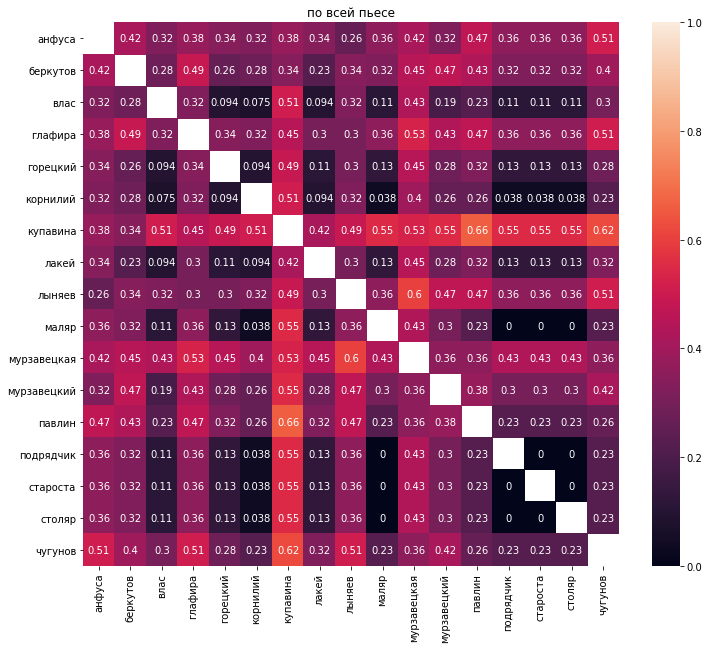

In [17]:
import seaborn as sns
plt.subplots(figsize=(12, 10))
sns.heatmap(distances_drama, vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes)
plt.title('по всей пьесе');

## Абстрактные типы отношений (= соп., <> альт., > или < дом.)

In [21]:
for i, j in zip(*np.where(distances_drama == 0)):
    if i != j and i < j:
        p = np.sum(matrix[i])
        q = np.sum(matrix[j])
        s = '=' if p == q else ('>' if p > q else '<')
        print(drama_heroes[i], s, drama_heroes[j])

маляр = подрядчик
маляр = староста
маляр = столяр
подрядчик = староста
подрядчик = столяр
староста = столяр


## Ранг

In [22]:
rank = [np.sum(np.sum(matrix, axis=0)[np.where(matrix[i] != 0)[0]] - 1) for i in range(len(drama_heroes))]

In [23]:
df = pd.DataFrame({h: r for h, r in zip(drama_heroes, rank)}, index=['ранг']).sort_values(by='ранг', axis=1, ascending=False)
df

,купавина,мурзавецкая,глафира,павлин,анфуса,чугунов,лыняев,беркутов,мурзавецкий,маляр,подрядчик,староста,столяр,корнилий,лакей,горецкий,влас
ранг,58,56,47,44,42,42,36,33,27,22,22,22,22,13,8,5,5


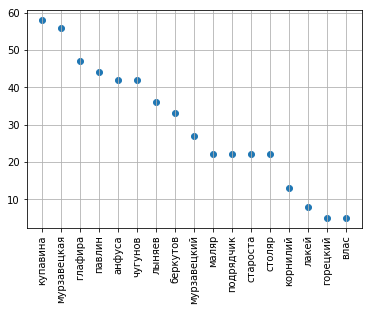

In [24]:
plt.scatter(range(len(drama_heroes)), df.values)
plt.xticks(range(len(drama_heroes)), df.columns, rotation=90)
plt.grid()

## Абсолютные относительные частоты

In [25]:
busyness = busyness.values[0]

In [26]:
freq_abs = busyness/len(matrix[0])
pd.DataFrame({h: f for h, f in zip(drama_heroes, freq_abs)}, index=['частоты']).round(3)

,анфуса,беркутов,влас,глафира,горецкий,корнилий,купавина,лакей,лыняев,маляр,мурзавецкая,мурзавецкий,павлин,подрядчик,староста,столяр,чугунов
частоты,0.283,0.245,0.038,0.321,0.057,0.038,0.472,0.057,0.283,0.075,0.396,0.226,0.264,0.075,0.075,0.075,0.264


## Условные относительные частоты

In [27]:
freq_rel = np.zeros((len(drama_heroes), len(drama_heroes)))
for i in range(len(matrix)):
    for j in range(len(matrix)):
        freq_rel[i, j] = np.count_nonzero(matrix[i] + matrix[j] - 2 == 0)/busyness[j]

In [28]:
pd.DataFrame(freq_rel, index=drama_heroes, columns=drama_heroes).round(3)

,анфуса,беркутов,влас,глафира,горецкий,корнилий,купавина,лакей,лыняев,маляр,мурзавецкая,мурзавецкий,павлин,подрядчик,староста,столяр,чугунов
анфуса,1.000,0.231,0.0,0.353,0.000,0.0,0.40,0.000,0.533,0.00,0.333,0.417,0.143,0.00,0.00,0.00,0.071
беркутов,0.200,1.000,0.0,0.118,0.333,0.0,0.40,0.667,0.333,0.00,0.238,0.000,0.143,0.00,0.00,0.00,0.214
влас,0.000,0.000,1.0,0.059,0.000,0.0,0.00,0.000,0.000,0.00,0.000,0.167,0.143,0.00,0.00,0.00,0.000
глафира,0.400,0.154,0.5,1.000,0.333,0.5,0.36,0.667,0.533,0.25,0.238,0.250,0.214,0.25,0.25,0.25,0.143
горецкий,0.000,0.077,0.0,0.059,1.000,0.0,0.04,0.000,0.067,0.00,0.000,0.000,0.000,0.00,0.00,0.00,0.071
корнилий,0.000,0.000,0.0,0.059,0.000,1.0,0.00,0.000,0.000,0.50,0.048,0.000,0.071,0.50,0.50,0.50,0.143
купавина,0.667,0.769,0.0,0.529,0.333,0.0,1.00,1.000,0.467,0.00,0.429,0.333,0.143,0.00,0.00,0.00,0.214
лакей,0.000,0.154,0.0,0.118,0.000,0.0,0.12,1.000,0.067,0.00,0.000,0.000,0.000,0.00,0.00,0.00,0.000
лыняев,0.533,0.385,0.0,0.471,0.333,0.0,0.28,0.333,1.000,0.00,0.095,0.083,0.143,0.00,0.00,0.00,0.071
маляр,0.000,0.000,0.0,0.059,0.000,1.0,0.00,0.000,0.000,1.00,0.048,0.000,0.214,1.00,1.00,1.00,0.214


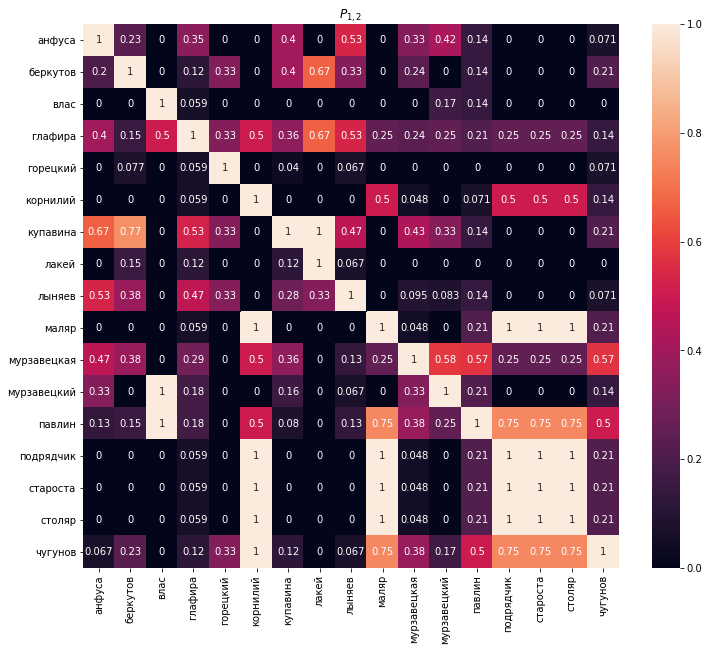

In [29]:
plt.subplots(figsize=(12, 10))
sns.heatmap(freq_rel, vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes)
plt.title(r"$P_{1,2}$");

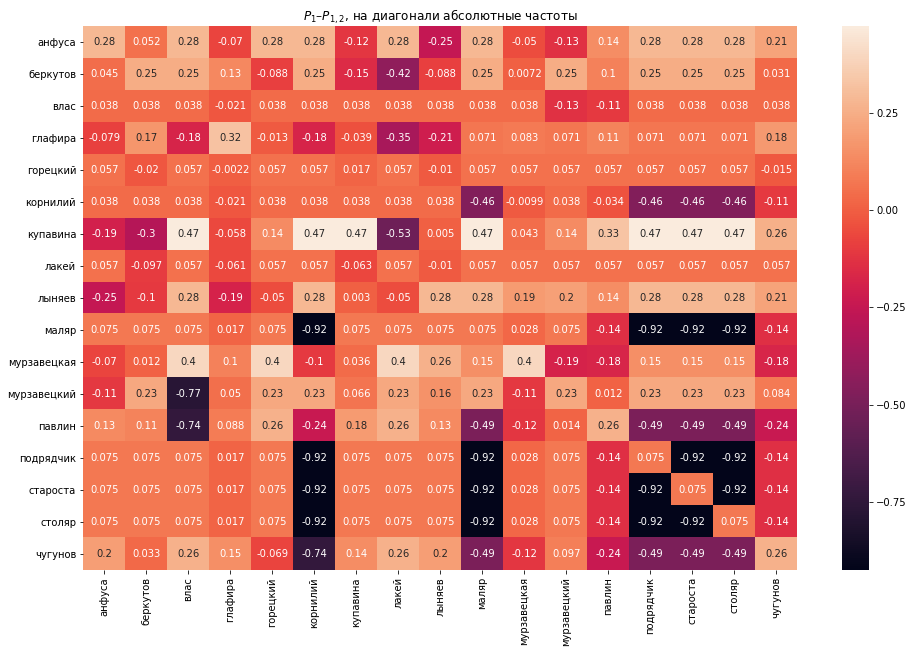

In [30]:
freq = freq_abs.reshape((-1, 1)) - freq_rel
freq[np.diag_indices(len(freq[0]))] = freq_abs
plt.subplots(figsize=(16, 10))
sns.heatmap(freq, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes)
plt.title(r"$P_1 – P_{1,2}$, на диагонали абсолютные частоты");